In [3]:
import numpy as np
from statsmodels import regression 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
start = '2016-01-01'
end = '2017-01-01'
yf.download("AAPL",start_date=start, end_date=end)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600
...,...,...,...,...,...,...
2021-06-21,130.300003,132.410004,129.210007,132.300003,132.300003,79663300
2021-06-22,132.130005,134.080002,131.619995,133.979996,133.979996,74783600
2021-06-23,133.770004,134.320007,133.229996,133.699997,133.699997,60214200


In [9]:
start = '2016-01-01'
end = '2017-01-01'

asset =yf.download("AAPL",start_date=start, end_date=end, period = "720d")['Adj Close']
benchmark = yf.download("SPY",start_date=start, end_date=end, period = "720d")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
asset_ret = asset.pct_change(1)[1:]
bench_ret =benchmark.pct_change(1)[1:]

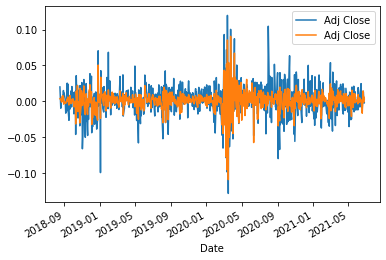

In [12]:
asset_ret.plot()
bench_ret.plot()
plt.legend()

Text(0, 0.5, 'AAPL')

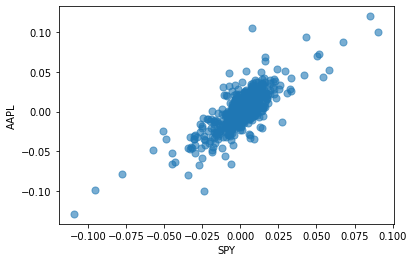

In [13]:
plt.scatter(bench_ret,asset_ret,alpha = .6, s = 50)
plt.xlabel('SPY')
plt.ylabel('AAPL')

In [14]:
AAPL = asset_ret.values
spy  = bench_ret.values

In [15]:
spy_constant = sm.add_constant(spy)

In [16]:
model = regression.linear_model.OLS(AAPL,spy_constant).fit()

In [17]:
model.params

array([6.50403111e-04, 1.24391504e+00])

In [18]:
alpha,beta = model.params

In [19]:
alpha

0.000650403111331393

In [20]:
beta

1.2439150372086596

Text(0, 0.5, 'AAPL')

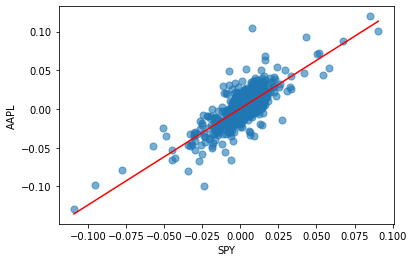

In [21]:
min_spy = bench_ret.values.min()
max_spy = bench_ret.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y= spy_line*beta +alpha
plt.plot(spy_line,y,'r')
plt.scatter(bench_ret,asset_ret,alpha = .6, s = 50)
plt.xlabel('SPY')
plt.ylabel('AAPL')

In [22]:
hedged = -1*(beta*bench_ret) +asset_ret

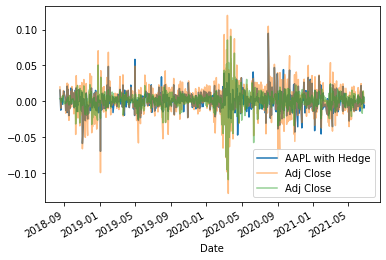

In [23]:
hedged.plot(label = 'AAPL with Hedge')
asset_ret.plot(alpha = .5)
bench_ret.plot(alpha = .5)
plt.legend()

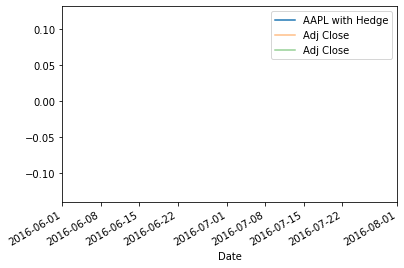

In [51]:
hedged.plot(label = 'AAPL with Hedge')
asset_ret.plot(alpha = .5)
bench_ret.plot(alpha = .5)
plt.xlim(['2016-06-01','2016-08-01'])
plt.legend()

In [52]:
def alpha_beta(benchmark_ret,stock):
    benchmark = sm.add_constant(benchmark_ret)
    
    model = regression.linear_model.OLS(stock,benchmark).fit()
    
    return model.params[0],model.params[1]
    

In [40]:
#2016
start = '2016-01-01'
end = '2021-01-01'
asset_ret2016 =yf.download("AAPL",start_date=start, end_date=end, period = "720d")['Adj Close']
benchmark_ret2016 = yf.download("SPY",start_date=start, end_date=end, period = "720d")['Adj Close']

asset_ret2016 = asset_ret2016.pct_change(1)[1:]
benchmark_ret2016 = benchmark_ret2016.pct_change(1)[1:]

aret_values = asset_ret2016.values
bret_values = benchmark_ret2016.values

alpha2016, beta2016 = alpha_beta(bret_values, aret_values)
print('2016 values')
print('alpha '+ str(alpha2016))
print('beta '+str(beta2016))




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2016 values
alpha 0.000650403111331393
beta 1.2439150372086596


In [43]:
portfolio = -1*beta2016*benchmark_ret2016 +  asset_ret2016


In [44]:
alpha,beta = alpha_beta(benchmark_ret2016,portfolio)


In [45]:
print('Portfolio alpha and beta ')
print('alpha ' +str(alpha))
print('beta '+str(beta))

Portfolio alpha and beta 
alpha 0.000650403111331393
beta -3.0878077872387166e-16


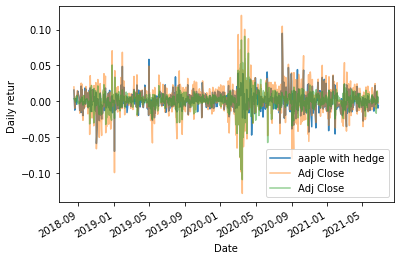

In [46]:
portfolio.plot(alpha = .9, label = 'aaple with hedge')
asset_ret2016.plot(alpha=.5)
benchmark_ret2016.plot(alpha = .5)
plt.ylabel('Daily retur ')
plt.legend()


In [47]:
portfolio.mean()

0.0006504031113313929

In [48]:
asset_ret2016.mean()

0.0015737664368722765

In [49]:
portfolio.std()

0.013847073373708614

In [50]:
asset_ret2016.std()

0.02273615323118472

In [69]:
#2016
start = '2017-01-01'
end = '2017-08-01'
asset_ret2017 = yf.download('AAPL', start_date=start, end_date=end, period = "720d")['Adj Close']
benchmark_ret2017 = yf.download('SPY',start_date=start, end_date=end, period = "720d")["Adj Close"]

asset_ret2017 = asset_ret2017.pct_change(1)[1:]
benchmark_ret2017 = benchmark_ret2017.pct_change(1)[1:]

aret_values = asset_ret2017.values
bret_values = benchmark_ret2017.values

alpha2017, beta2017 = alpha_beta(bret_values, aret_values)


print('2017 values')
print('alpha '+ str(alpha2017))
print('beta '+str(beta2017))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2017 values
alpha 0.000650403111331393
beta 1.2439150372086596


In [70]:
alpha2016

0.000650403111331393

In [71]:
beta2016

1.2439150372086596

In [72]:
alpha2017

0.000650403111331393

In [73]:
beta2017

1.2439150372086596

In [74]:
portfolio = -1*beta2016*benchmark_ret2017 +asset_ret2017


In [75]:
alpha, beta = alpha_beta(benchmark_ret2017,portfolio)

In [76]:
alpha

0.000650403111331393

In [77]:
beta

-3.0878077872387166e-16

In [78]:
portfolio.mean()

0.0006504031113313929

In [79]:
asset_ret2017.mean()

0.0015737664368722765

In [80]:
portfolio.std()

0.013847073373708614

In [81]:
asset_ret2017.std()

0.02273615323118472